In [62]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

from japanmap import picture

In [63]:
prefecture_code = pd.read_csv("japan_housing_data/prefecture_code.csv")
prefecture_code.head()

,Code,JpName,EnName
0,1,北海道,Hokkaido
1,2,青森県,Aomori
2,3,岩手県,Iwate
3,4,宮城県,Miyagi
4,5,秋田県,Akita


In [64]:
df = pd.DataFrame()

data_dir = "japan_housing_data/trade_prices"

for f in os.listdir(data_dir):
    df_prefecture = pd.read_csv(os.path.join(data_dir, f), low_memory=False)
    df_prefecture["Code"] = int(f.split(".")[0])
    df = pd.concat([df, df_prefecture])

df.head()

,No,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,...,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,Code
0,1,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Aobadai,Moji,30-60minutes,30.0,...,4.0,Category I Exclusively Low-story Residential Zone,50.0,80.0,4th quarter 2017,2017,4,NaN,NaN,40
1,2,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Komorie,30-60minutes,30.0,...,4.0,Urbanization Control Area,NaN,NaN,1st quarter 2018,2018,1,NaN,NaN,40
2,3,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,4.0,Urbanization Control Area,NaN,NaN,4th quarter 2017,2017,4,NaN,NaN,40
3,4,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,35.0,Urbanization Control Area,70.0,200.0,4th quarter 2016,2016,4,NaN,NaN,40
4,5,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,NaN,Urbanization Control Area,70.0,200.0,3rd quarter 2016,2016,3,NaN,NaN,40


In [65]:
df = pd.merge(left=df, right=prefecture_code, left_on="Code", right_on="Code", how="left")
df.head()

,No,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,...,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,Code,JpName,EnName
0,1,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Aobadai,Moji,30-60minutes,30.0,...,50.0,80.0,4th quarter 2017,2017,4,NaN,NaN,40,福岡県,Fukuoka
1,2,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Komorie,30-60minutes,30.0,...,NaN,NaN,1st quarter 2018,2018,1,NaN,NaN,40,福岡県,Fukuoka
2,3,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,NaN,NaN,4th quarter 2017,2017,4,NaN,NaN,40,福岡県,Fukuoka
3,4,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,70.0,200.0,4th quarter 2016,2016,4,NaN,NaN,40,福岡県,Fukuoka
4,5,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,70.0,200.0,3rd quarter 2016,2016,3,NaN,NaN,40,福岡県,Fukuoka


In [66]:
df.columns

Index(['No', 'Type', 'Region', 'MunicipalityCode', 'Prefecture',
       'Municipality', 'DistrictName', 'NearestStation',
       'TimeToNearestStation', 'MinTimeToNearestStation',
       'MaxTimeToNearestStation', 'TradePrice', 'FloorPlan', 'Area',
       'AreaIsGreaterFlag', 'UnitPrice', 'PricePerTsubo', 'LandShape',
       'Frontage', 'FrontageIsGreaterFlag', 'TotalFloorArea',
       'TotalFloorAreaIsGreaterFlag', 'BuildingYear', 'PrewarBuilding',
       'Structure', 'Use', 'Purpose', 'Direction', 'Classification', 'Breadth',
       'CityPlanning', 'CoverageRatio', 'FloorAreaRatio', 'Period', 'Year',
       'Quarter', 'Renovation', 'Remarks', 'Code', 'JpName', 'EnName'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906518 entries, 0 to 3906517
Data columns (total 41 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   No                           int64  
 1   Type                         object 
 2   Region                       object 
 3   MunicipalityCode             int64  
 4   Prefecture                   object 
 5   Municipality                 object 
 6   DistrictName                 object 
 7   NearestStation               object 
 8   TimeToNearestStation         object 
 9   MinTimeToNearestStation      float64
 10  MaxTimeToNearestStation      float64
 11  TradePrice                   int64  
 12  FloorPlan                    object 
 13  Area                         int64  
 14  AreaIsGreaterFlag            int64  
 15  UnitPrice                    float64
 16  PricePerTsubo                float64
 17  LandShape                    object 
 18  Frontage                     float64
 19  

In [68]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))  

,No,MunicipalityCode,MinTimeToNearestStation,MaxTimeToNearestStation,TradePrice,Area,AreaIsGreaterFlag,UnitPrice,PricePerTsubo,Frontage,TotalFloorArea,TotalFloorAreaIsGreaterFlag,BuildingYear,PrewarBuilding,Breadth,CoverageRatio,FloorAreaRatio,Year,Quarter,Code
count,3906518.0,3906518.0,3315977.0,3228071.0,3906518.0,3906518.0,3906518.0,1384415.0,1384415.0,2537063.0,1317660.0,3906518.0,1869804.0,3906518.0,2685837.0,3191877.0,3191877.0,3906518.0,3906518.0,3906518.0
mean,78354.1,20467.1,22.6,27.4,27605894.6,467.4,0.0,85148.9,281406.5,14.6,175.2,0.0,1995.5,0.0,6.8,61.0,209.0,2012.9,2.5,20.3
std,80173.6,12175.5,23.1,27.7,141745961.4,847.7,0.2,168683.2,557031.6,9.8,256.4,0.1,15.2,0.0,4.6,10.0,107.5,3.7,1.1,12.2
min,1.0,1101.0,0.0,0.0,100.0,10.0,0.0,1.0,2.0,0.1,10.0,0.0,1945.0,0.0,1.0,30.0,50.0,2005.0,1.0,1.0
25%,20780.0,12204.0,9.0,8.0,5000000.0,100.0,0.0,16000.0,55000.0,8.5,95.0,0.0,1984.0,0.0,4.0,60.0,200.0,2010.0,2.0,12.0
50%,48159.0,17210.0,16.0,15.0,14000000.0,185.0,0.0,40000.0,130000.0,12.0,105.0,0.0,1996.0,0.0,6.0,60.0,200.0,2013.0,3.0,17.0
75%,114733.0,28110.0,30.0,29.0,29000000.0,370.0,0.0,91000.0,300000.0,17.0,140.0,0.0,2009.0,0.0,7.0,60.0,200.0,2016.0,4.0,28.0
max,406575.0,47382.0,120.0,120.0,61000000000.0,5000.0,1.0,20000000.0,66000000.0,50.0,2000.0,1.0,2020.0,1.0,99.9,80.0,1300.0,2019.0,4.0,47.0


In [69]:
df['EnName'] = df['EnName'].apply(lambda x: x.rstrip())

In [70]:
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
print("Missing percentage\n")
print(missing_percentage)

Missing percentage

Remarks                        94.064791
Renovation                     85.578052
FloorPlan                      84.713497
Purpose                        69.722960
TotalFloorArea                 66.270218
PricePerTsubo                  64.561407
UnitPrice                      64.561407
BuildingYear                   52.136301
Use                            51.709579
Structure                      51.041490
Frontage                       35.055643
Breadth                        31.247290
Classification                 30.514719
Direction                      28.901646
LandShape                      28.862788
Region                         28.595209
FloorAreaRatio                 18.293555
CoverageRatio                  18.293555
MaxTimeToNearestStation        17.367052
MinTimeToNearestStation        15.116812
TimeToNearestStation           15.116812
NearestStation                 14.483768
CityPlanning                   13.584118
DistrictName                    0.211

In [71]:
df['MunicipalityCode'] = df['MunicipalityCode'].astype(str)

In [72]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna('unkown', inplace=True)

In [73]:
df_copy = df.copy()

In [74]:
hokkaido_df = df_copy[df_copy.EnName == 'Hokkaido']


In [75]:
split_index = int(len(hokkaido_df) * 0.85)

hokkaido_df = hokkaido_df.sort_values(by=['Year', 'Quarter'])

In [76]:
hokkaido_df[["Year", "Quarter"]].head(100050)

,Year,Quarter
2044710,2005,3
2060915,2005,3
2096767,2005,3
2103198,2005,3
2055085,2005,4
...,...,...
2056403,2014,1
2056716,2014,1
2056835,2014,1
2056847,2014,1


In [77]:
train_df = hokkaido_df.iloc[:split_index]
test_df = hokkaido_df.iloc[split_index:]

In [78]:
print(test_df[['Year', 'Quarter']].head(100000))

         Year  Quarter
2190922  2017        3
2190937  2017        3
2190995  2017        3
2190996  2017        3
2191042  2017        3
...       ...      ...
2218585  2019        3
2218922  2019        3
2218984  2019        3
2219076  2019        3
2219108  2019        3

[27936 rows x 2 columns]


In [79]:
def cap_outliers(series, lower_percentile=0.01, upper_percentile=0.99):
    lower = series.quantile(lower_percentile)
    upper = series.quantile(upper_percentile)
    return np.clip(series, lower, upper)

In [80]:
columns_to_cap = ["Area", "TotalFloorArea","FloorAreaRatio"]
for col in columns_to_cap:    
    train_df[col] = cap_outliers(train_df[col])

In [81]:
missing_numerical = train_df.select_dtypes(include=['float64', 'int64']).isna().sum().sort_values(ascending=False)
missing_percentage = (train_df.select_dtypes(include=['float64', 'int64']).isnull().mean() * 100).sort_values(ascending=False)
print("Missing values in numerical variables:")
print(missing_numerical[missing_numerical > 0])
print("\n")
print(missing_percentage[missing_numerical > 0])

Missing values in numerical variables:
TotalFloorArea             105318
UnitPrice                  102262
PricePerTsubo              102262
BuildingYear                89278
Frontage                    52357
Breadth                     49956
FloorAreaRatio              38958
CoverageRatio               38958
MaxTimeToNearestStation     38738
MinTimeToNearestStation     35758
dtype: int64


TotalFloorArea             66.529797
UnitPrice                  64.599310
PricePerTsubo              64.599310
BuildingYear               56.397266
Frontage                   33.074124
Breadth                    31.557403
FloorAreaRatio             24.609923
CoverageRatio              24.609923
MaxTimeToNearestStation    24.470948
MinTimeToNearestStation    22.588470
dtype: float64


In [82]:
columns_to_drop = ['JpName', 'DistrictName', 'UnitPrice','PricePerTsubo', 'No', 
                   'TimeToNearestStation', 'TotalFloorAreaIsGreaterFlag', 'NearestStation', 
                   'Period', 'Year', 'Municipality', 'EnName', 'Prefecture', 
                   'AreaIsGreaterFlag', 'Quarter', 'FrontageIsGreaterFlag'
                   ]
train_df = train_df.drop(columns= columns_to_drop)
test_df = test_df.drop(columns= columns_to_drop)

In [83]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

numerical_columns = train_df.select_dtypes(include=['number']).columns
train_df_mean = train_df.copy()
test_df_mean = test_df.copy()
train_df_mean[numerical_columns] = imp_mean.fit_transform(train_df_mean[numerical_columns])
test_df_mean[numerical_columns] = imp_mean.transform(test_df_mean[numerical_columns])
print(test_df_mean[numerical_columns])


         MinTimeToNearestStation  MaxTimeToNearestStation  TradePrice    Area  \
2190922                24.000000                24.000000  29000000.0   990.0   
2190937                 1.000000                 1.000000   2600000.0   620.0   
2190995                26.642969                34.904118   1600000.0  5000.0   
2190996                26.642969                34.904118    610000.0  5000.0   
2191042                26.642969                34.904118   3800000.0  5000.0   
...                          ...                      ...         ...     ...   
2218585                26.642969                34.904118  18000000.0  1100.0   
2218922                26.642969                34.904118   5300000.0   360.0   
2218984                26.642969                34.904118  30000000.0  1200.0   
2219076                26.642969                34.904118   9500000.0   260.0   
2219108                26.642969                34.904118     50000.0   420.0   

          Frontage  TotalFl

In [84]:
X_train = train_df_mean.drop(columns=["TradePrice"])
y_train = train_df_mean["TradePrice"]
X_test = test_df_mean.drop(columns=["TradePrice"])
y_test = test_df_mean["TradePrice"]

In [85]:
print("Training data shape: ", X_train.shape, y_train.shape)
print("Test data shape: ", X_test.shape, y_test.shape)

Training data shape:  (158302, 24) (158302,)
Test data shape:  (27936, 24) (27936,)


In [86]:
missing_numerical = X_train.select_dtypes(include=['float64', 'int64']).isna().sum().sort_values(ascending=False)
missing_percentage = (X_train.select_dtypes(include=['float64', 'int64']).isnull().mean() * 100).sort_values(ascending=False)
print("Missing values in numerical variables:")
print(missing_numerical[missing_numerical > 0])
print("\n")
print(missing_percentage[missing_numerical > 0])

Missing values in numerical variables:
Series([], dtype: int64)


Series([], dtype: float64)


R-squared: 0.6002

Feature Importances:
                    Feature  Importance
9            TotalFloorArea    0.200117
10             BuildingYear    0.135148
2          MunicipalityCode    0.097654
6                      Area    0.090777
20           FloorAreaRatio    0.059735
17                  Breadth    0.055171
8                  Frontage    0.051514
3   MinTimeToNearestStation    0.050127
4   MaxTimeToNearestStation    0.046252
18             CityPlanning    0.045152
7                 LandShape    0.040616
15                Direction    0.031674
13                      Use    0.025092
14                  Purpose    0.016379
1                    Region    0.015766
16           Classification    0.013947
12                Structure    0.010503
19            CoverageRatio    0.006063
22                  Remarks    0.005077
0                      Type    0.002532
11           PrewarBuilding    0.000622
5                 FloorPlan    0.000042
21               Renovation    0.000037


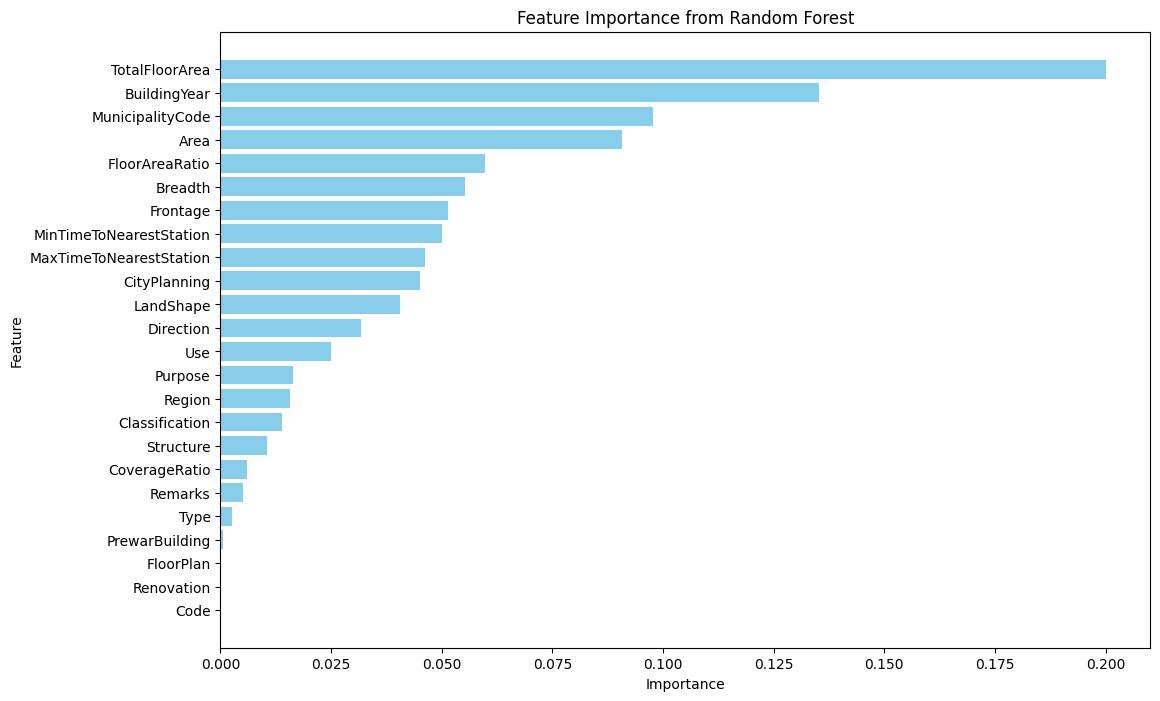

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

categorical_cols = X_train.select_dtypes(include=['object']).columns


label_encoders = {}  
if not categorical_cols.empty:
    for col in categorical_cols:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        label_encoders[col] = le  

        test_values = X_test[col].unique()
        train_values = le.classes_

        unseen_labels = set(test_values) - set(train_values)
        le.classes_ = np.append(le.classes_, list(unseen_labels))

        X_test[col] = le.transform(X_test[col])

assert X_train.select_dtypes(include=['object']).empty, "X_train still has non-numeric columns!"
assert X_test.select_dtypes(include=['object']).empty, "X_test still has non-numeric columns!"


rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


r2_rf = r2_score(y_test, y_pred)


print(f"R-squared: {r2_rf:.4f}")

importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)


plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

## XGBoost

In [88]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred_xgb = pipeline.predict(X_test)

# mae_rf = mean_absolute_error(y_test, y_pred)
# mse_rf = mean_squared_error(y_test, y_pred)
# rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

# print("\nRandom Forest Model Performance:")
# print(f"Mean Absolute Error: {mae_rf:.4f}")
# print(f"Mean Squared Error: {mse_rf:.4f}")
# print(f"Root Mean Squared Error: {rmse_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")

R-squared: 0.6002


In [89]:
top_12_features = importance_df.head(12)['Feature'].tolist()
print("Top 12 Features:", top_12_features)

Top 12 Features: ['TotalFloorArea', 'BuildingYear', 'MunicipalityCode', 'Area', 'FloorAreaRatio', 'Breadth', 'Frontage', 'MinTimeToNearestStation', 'MaxTimeToNearestStation', 'CityPlanning', 'LandShape', 'Direction']


In [60]:
relevant_features = top_12_features
X_train = X_train[relevant_features]
X_test = X_test[relevant_features]
X_test = X_test[relevant_features]

## Stacking Regressor

In [90]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor

print(X_train.shape, y_train.shape)

categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['number']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

base_models = [
    ('linear', LinearRegression(n_jobs=-1)),          
    ('gb', GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)),
    ('xgboost', XGBRegressor(n_estimators=70, learning_rate=0.1, random_state=42))
]

stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(n_jobs=-1),
    n_jobs=-1,  
    passthrough=False  
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stacking_model)
])
pipeline.fit(X_train, y_train)

y_pred_ensemble = pipeline.predict(X_test)

# mae_rf = mean_absolute_error(y_test, y_pred)
# mse_rf = mean_squared_error(y_test, y_pred)
# rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

# print("\nRandom Forest Model Performance:")
# print(f"Mean Absolute Error: {mae_rf:.4f}")
# print(f"Mean Squared Error: {mse_rf:.4f}")
# print(f"Root Mean Squared Error: {rmse_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")


(158302, 24) (158302,)
R-squared: 0.6002


In [91]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor

print(X_train.shape, y_train.shape)

categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['number']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

base_models = [
    ('linear', LinearRegression(n_jobs=-1)),          
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)),
    ('xgboost', XGBRegressor(n_estimators=70, learning_rate=0.1, random_state=42))
]

stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(n_jobs=-1),
    n_jobs=-1,  
    passthrough=False  
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stacking_model)
])
pipeline.fit(X_train, y_train)

y_pred_ensemble = pipeline.predict(X_test)

# mae_rf = mean_absolute_error(y_test, y_pred)
# mse_rf = mean_squared_error(y_test, y_pred)
# rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

# print("\nRandom Forest Model Performance:")
# print(f"Mean Absolute Error: {mae_rf:.4f}")
# print(f"Mean Squared Error: {mse_rf:.4f}")
# print(f"Root Mean Squared Error: {rmse_rf:.4f}")
print("\nEnsemble Model Performance:")
print(f"R-squared: {r2_rf:.4f}")


(158302, 24) (158302,)

Ensemble Model Performance:
R-squared: 0.6002
